# Absorbing Classes for Markov Chains

For work on http://stackoverflow.com/a/37626675/2246

- A communicating class is a subgraph where every node communicates with (at least) every other node in the class
- An absorbing class means that that once in the class you cannot escape

How do you get communicating classes?
- strongly connected neighbours "a (sub-)graph is said to be strongly connected if every vertex is reachable from every other vertex"

In [5]:
%matplotlib inline
import networkx as nx
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

In [44]:
g2 = nx.DiGraph()
g2.add_edge(1,1)
g2.add_edge(2,1)
g2.add_edge(2,3)
g2.add_edge(3,2)
g2.add_edge(3,4)
g2.add_edge(4,5)
g2.add_edge(5,4)


print list(nx.strongly_connected_components(g2))

[[1, 2, 3, 4, 5]]
[[1], [4, 5], [2, 3]]


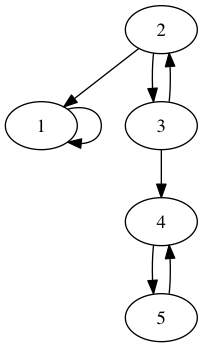

In [45]:
nxpd.draw(g2)

In [67]:
def absorbing_classes(g):
    internal = set()
    
    # Tarjan is approximately linear O(|V| + |E|)
    cpts = list(nx.strongly_connected_component_subgraphs(g))
    for sg in cpts:
        for e in sg.edges():
            internal.add(e)
    
    # find all the edges that aren't part of the strongly connected components
    # linear in O(E)
    transient_edges = set(g.edges()) - internal
    
    # find the start of the directed edge leading out from a component
    # linear in O(E)
    transient_srcs = set([ e[0] for e in transient_edges ])
    
    # yield everything that don't have a vertex in transient_srcs
    for sg in cpts:
        if transient_srcs - set(sg.nodes()):
            yield sg

In [68]:
for g in absorbing_classes(g2):
    print g.nodes()

[1]
[4, 5]


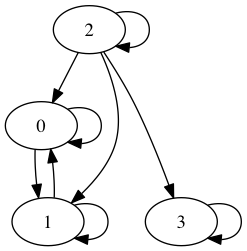

In [76]:
import numpy as np
P = np.array([[0.6,0.4,0.,0.],[0.3,0.7,0.,0.],[0.2,0.4,0.2,0.2],[0.,0.,0.,1.]])
g2 = nx.from_numpy_matrix(P, create_using=nx.DiGraph())
nxpd.draw(g2)

In [77]:
for subg in absorbing_classes(g2):
    print subg.nodes()

[0, 1]
[3]
